In [12]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [13]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

Data shape: (45211, 9)


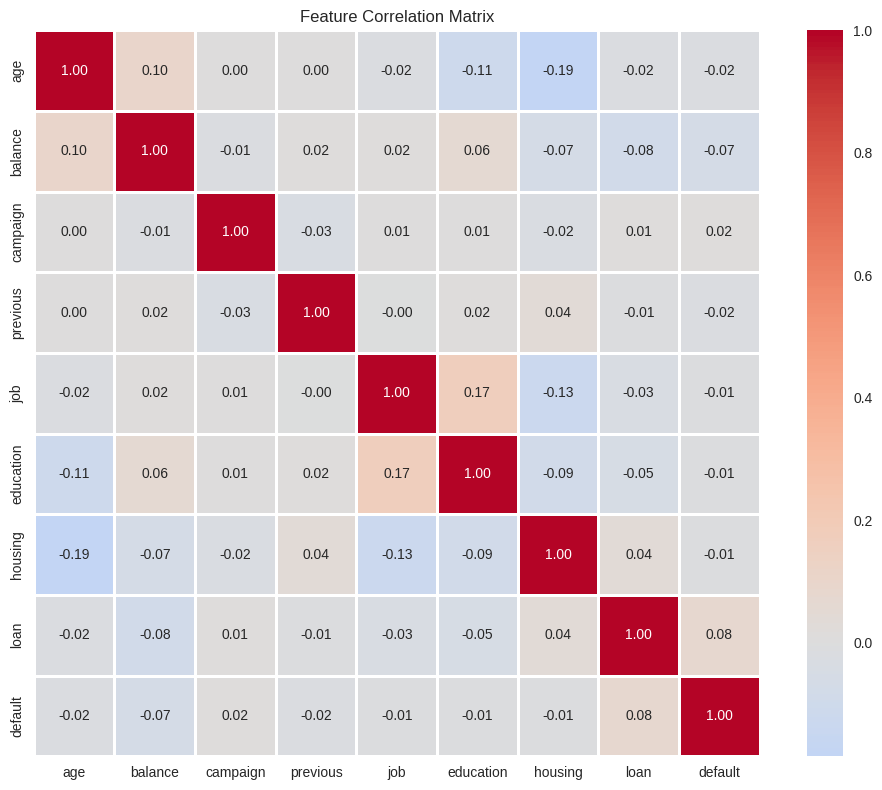

In [14]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset."""
    # Load data with semicolon separator
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df
     # Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

def plot_correlation_heatmap(df, features):
    """Plot correlation heatmap for features."""
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[features].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()

# Plot correlation heatmap (ADD THIS BEFORE PCA)
features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
           'housing', 'loan', 'default']
plot_correlation_heatmap(data, features)

In [15]:
class KMeansClustering:
    """K-means clustering implementation."""
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids by randomly selecting points from X."""
        np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        centroids = X[random_indices]
        return centroids

    def _assign_clusters(self, X):
        """Assign each sample to the nearest centroid."""
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of assigned points."""
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = cluster_points.mean(axis=0)
            else:
                # Reinitialize empty cluster with a random point
                centroids[i] = X[np.random.choice(X.shape[0])]
        return centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters."""
        self.centroids = self._initialize_centroids(X)

        for iteration in range(self.max_iters):
            old_centroids = self.centroids.copy()

            # Assign clusters
            self.labels = self._assign_clusters(X)

            # Update centroids
            self.centroids = self._update_centroids(X, self.labels)

            # Check for convergence
            if np.allclose(old_centroids, self.centroids, rtol=1e-6):
                break

        return self

    def predict(self, X):
        """Assign cluster labels to X using learned centroids."""
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

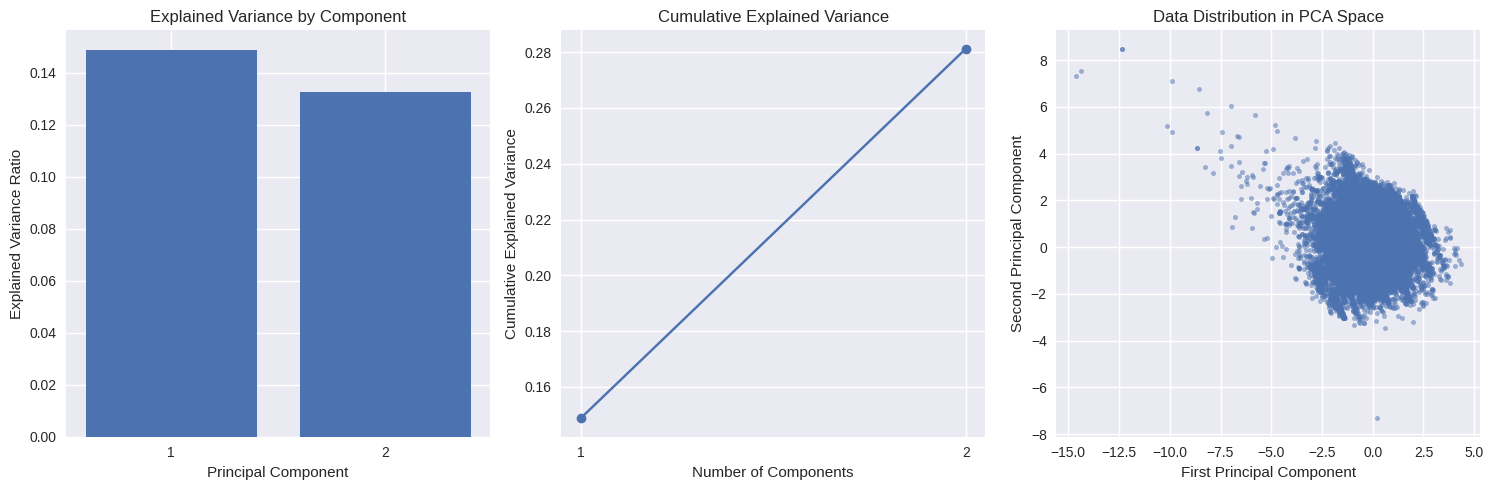

Explained variance by PC1: 0.1488
Explained variance by PC2: 0.1324
Total explained variance: 0.2812
Shape after PCA: (45211, 2)


In [18]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction."""
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Create visualizations
    plt.figure(figsize=(15, 5))

    # Plot 1: Explained variance ratio
    plt.subplot(1, 3, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Component')
    plt.xticks(range(1, n_components + 1))

    # Plot 2: Cumulative explained variance
    plt.subplot(1, 3, 2)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, n_components + 1), cumulative_variance, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance')
    plt.grid(True)
    plt.xticks(range(1, n_components + 1))

    # Plot 3: Data distribution in 2D
    plt.subplot(1, 3, 3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Data Distribution in PCA Space')

    plt.tight_layout()
    plt.show()

    print(f"Explained variance by PC1: {pca.explained_variance_ratio_[0]:.4f}")
    print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]:.4f}")
    print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

    return X_pca
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Computing elbow curve...
k=2: Inertia=75892.03, Silhouette=0.3311
k=3: Inertia=48179.64, Silhouette=0.3867
k=4: Inertia=38059.02, Silhouette=0.3581
k=5: Inertia=31800.29, Silhouette=0.3494
k=6: Inertia=27188.82, Silhouette=0.3669
k=7: Inertia=23384.33, Silhouette=0.3719
k=8: Inertia=20709.54, Silhouette=0.3751
k=9: Inertia=19113.00, Silhouette=0.3689
k=10: Inertia=17985.76, Silhouette=0.3445


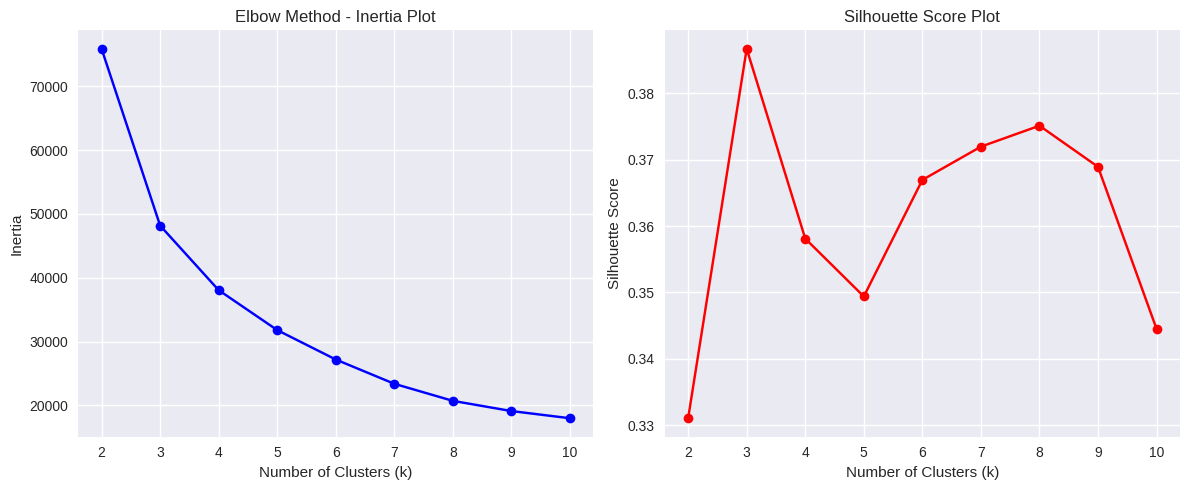

In [21]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia)."""
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
            inertia += np.sum(distances ** 2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters."""
    inertias = []
    silhouette_scores = []
    K = range(2, max_k + 1)  # Start from 2 for silhouette score

    print("Computing elbow curve...")
    for k in K:
        kmeans = KMeansClustering(n_clusters=k)
        kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)

        # Calculate silhouette score
        if k > 1:
            sil_score = silhouette_score(X, kmeans.labels)
            silhouette_scores.append(sil_score)
        print(f"k={k}: Inertia={inertia:.2f}, Silhouette={sil_score:.4f}")

    # Create elbow plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method - Inertia Plot')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Plot')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return inertias, silhouette_scores

inertias, silhouette_scores = plot_elbow_curve(X_pca, max_k=10)

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

/tmp/ipython-input-293227196.py:85: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cluster_silhouette_data, labels=unique_labels)


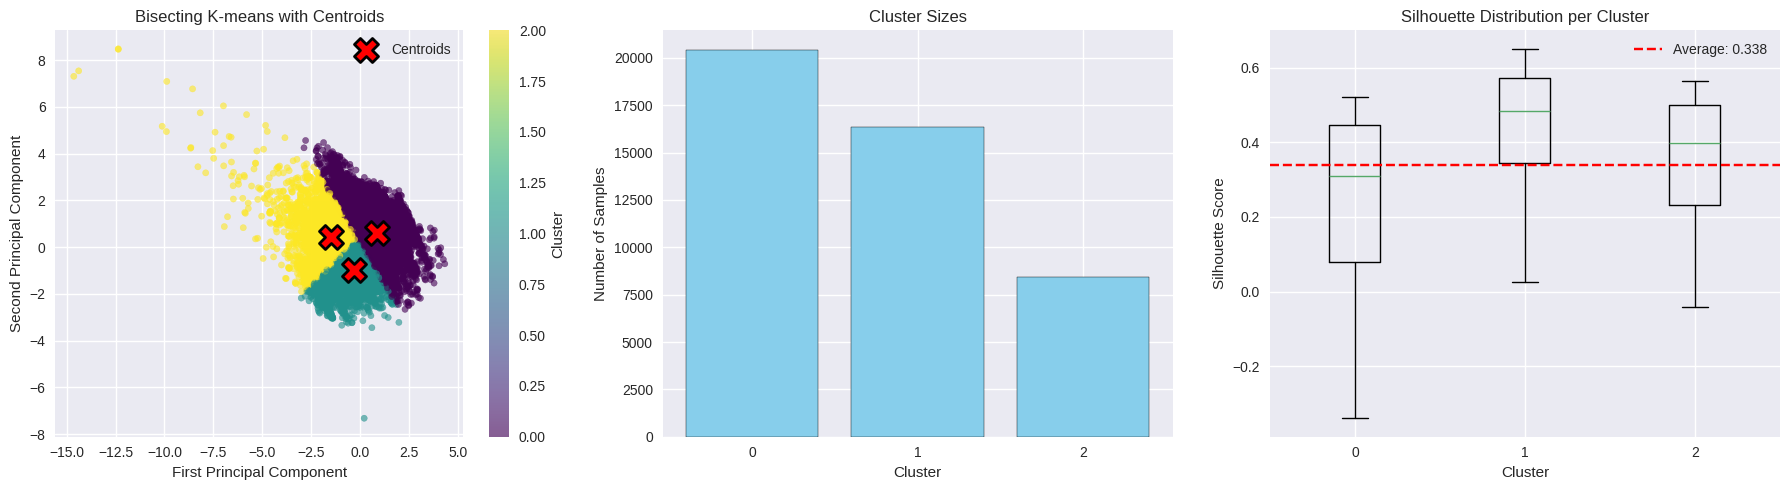


Bisecting K-means Silhouette Score: 0.3379


In [26]:
from sklearn.cluster import KMeans

class BisectingKMeans:
    """Bisecting K-means implementation."""
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {}
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until n_clusters is reached."""
        n_samples = X.shape[0]
        self.labels_ = np.zeros(n_samples, dtype=int)
        next_label = 1

        # Store initial cluster
        self.centers_[0] = X.mean(axis=0)

        while len(np.unique(self.labels_)) < self.n_clusters:
            # Find the largest cluster
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            largest_cluster = unique_labels[np.argmax(counts)]

            # Get points in the largest cluster
            mask = self.labels_ == largest_cluster
            cluster_points = X[mask]

            # Split the cluster into two using KMeans
            kmeans = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = kmeans.fit_predict(cluster_points)

            # Update labels
            new_label = next_label
            next_label += 1

            # Assign new labels
            temp_labels = self.labels_[mask].copy()
            temp_labels[sub_labels == 1] = new_label
            self.labels_[mask] = temp_labels

            # Store centroids
            self.centers_[largest_cluster] = kmeans.cluster_centers_[0]
            self.centers_[new_label] = kmeans.cluster_centers_[1]

            # Store split tree
            self.split_tree[largest_cluster] = (largest_cluster, new_label)

        return self.labels_

def visualize_clustering_results(X_pca, labels, centroids, title="Clustering Results"):
    """Create comprehensive visualization of clustering results."""
    fig = plt.figure(figsize=(18, 5))

    # Plot 1: Scatter plot with centroids
    plt.subplot(1, 3, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, s=20)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=300,
                edgecolors='black', linewidths=2, label='Centroids')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(f'{title} with Centroids')
    plt.colorbar(scatter, label='Cluster')
    plt.legend()

    # Plot 2: Cluster sizes
    plt.subplot(1, 3, 2)
    unique_labels, counts = np.unique(labels, return_counts=True)
    plt.bar(unique_labels, counts, color='skyblue', edgecolor='black')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Samples')
    plt.title('Cluster Sizes')
    plt.xticks(unique_labels)

    # Plot 3: Silhouette distribution per cluster
    plt.subplot(1, 3, 3)
    from sklearn.metrics import silhouette_samples
    silhouette_vals = silhouette_samples(X_pca, labels)

    cluster_silhouette_data = []
    for label in unique_labels:
        cluster_silhouette_data.append(silhouette_vals[labels == label])

    plt.boxplot(cluster_silhouette_data, labels=unique_labels)
    plt.xlabel('Cluster')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Distribution per Cluster')
    plt.axhline(y=silhouette_score(X_pca, labels), color='r', linestyle='--',
                label=f'Average: {silhouette_score(X_pca, labels):.3f}')
    plt.legend()

    plt.tight_layout()
    plt.show()


    # Apply Bisecting K-Means - THIS WILL GENERATE OUTPUT
bisect = BisectingKMeans(n_clusters=3, random_state=42)
bisect_labels = bisect.fit_predict(X_pca)

# Get centroids for visualization
bisect_centroids = np.array([bisect.centers_[i] for i in range(3)])

# Visualize results - THIS WILL SHOW THE PLOTS
visualize_clustering_results(X_pca, bisect_labels, bisect_centroids, "Bisecting K-means")

# Calculate metrics
bisect_silhouette = silhouette_score(X_pca, bisect_labels)
print(f"\nBisecting K-means Silhouette Score: {bisect_silhouette:.4f}")

Running final K-means clustering with k=3...


/tmp/ipython-input-293227196.py:85: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cluster_silhouette_data, labels=unique_labels)


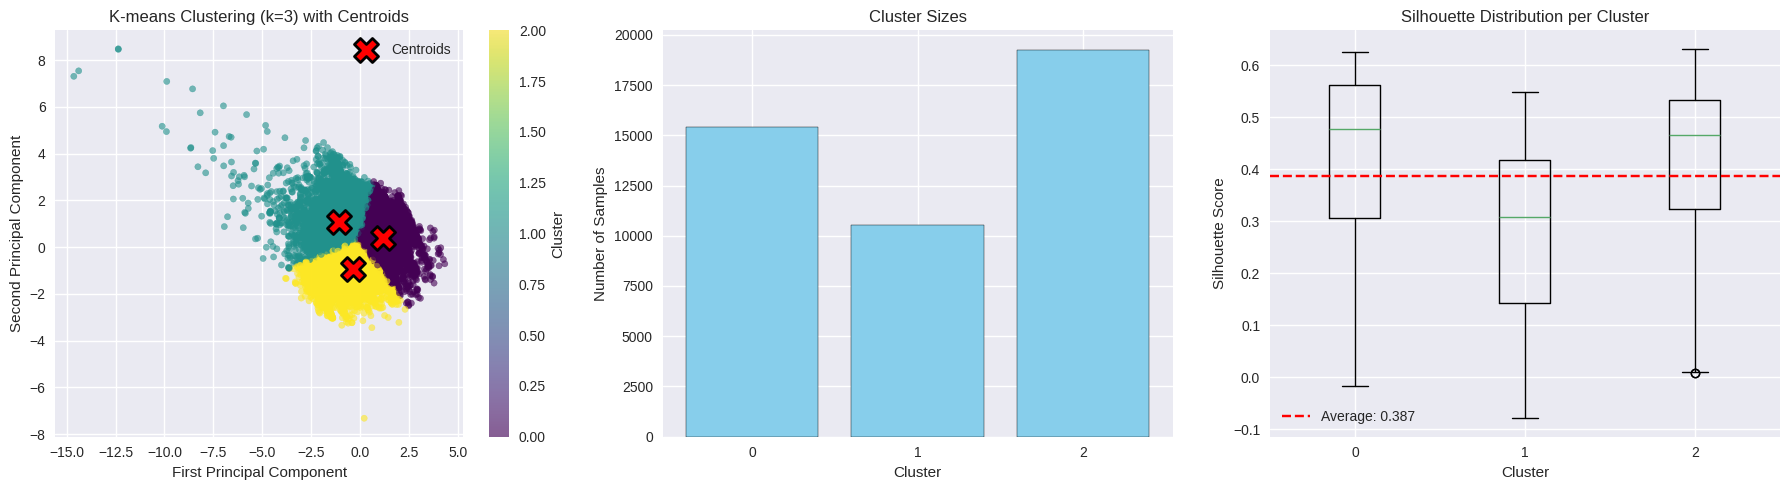


Final K-means (k=3) Silhouette Score: 0.3867


In [29]:


print("Running final K-means clustering with k=3...")

# 1. Instantiate and fit the model
kmeans_final = KMeansClustering(n_clusters=3, random_state=42)
kmeans_final.fit(X_pca)  # Use the .fit() method

# 2. Get the labels from the attribute
kmeans_labels = kmeans_final.labels

# 3. Get the final centroids
kmeans_centroids = kmeans_final.centroids

# 4. Visualize the results
visualize_clustering_results(X_pca, kmeans_labels, kmeans_centroids, "K-means Clustering (k=3)")

# 5. Calculate and print the final silhouette score
kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)
print(f"\nFinal K-means (k=3) Silhouette Score: {kmeans_silhouette:.4f}")

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!